In [172]:
from rdkit import Chem
from rdkit.Chem.BRICS import BRICSDecompose
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

['[H,$([3*])]O[H,$([3*])]', '[H,$([6*])]C(=O)O', '[H,$([8*])]C[H,$([8*])]', '[H,$([8*])]CC[H,$([8*])]', '[H,$([5*])]N([H,$([5*])])[H,$([5*])]', '[H,$([8*])]C(F)(F)F', '[H,$([11*])]S[H,$([11*])]', '[H,$([5*])]N1CCN([H,$([5*])])CC1', '[H,$([16*])]c1c([H,$([16*])])cc([H,$([16*])])c([H,$([16*])])c1', '[H,$([5*])]N1CCC([H,$([15*])])CC1', '[H,$([8*])]C(C)C', '[H,$([15*])]C1CC1', '[H,$([15*])]C1CCCCC1', '[H,$([5*])]N1CCOCC1', '[H,$([9*])]n1cnc2c(N)ncnc21', '[H,$([6*])]C([H,$([6*])])=O', '[H,$([5*])]N1CCC[C@H]1[H,$([13*])]', '[H,$([8*])]C(C)(C)C', '[H,$([14*])]c1cccs1', '[H,$([15*])]C1CCCC1', '[H,$([1*])]C(N)=O', '[H,$([12*])]S(=O)(=O)c1ccc([H,$([16*])])cc1', '[H,$([16*])]c1c[nH]c2ccccc12', '[H,$([14*])]c1ccnc([H,$([14*])])n1', '[H,$([14*])]c1ccc([H,$([16*])])cn1', '[H,$([16*])]c1cccc2ccccc12', '[H,$([5*])]NC(=N)N', '[H,$([12*])]S(C)(=O)=O', '[H,$([9*])]n1ccc(=O)[nH]c1=O', '[H,$([9*])]n1ccc(N)nc1=O', '[H,$([16*])]c1cc([H,$([16*])])cc([H,$([16*])])c1', '[H,$([9*])]n1ccnc1', '[H,$([9*])]n1cc(C)c

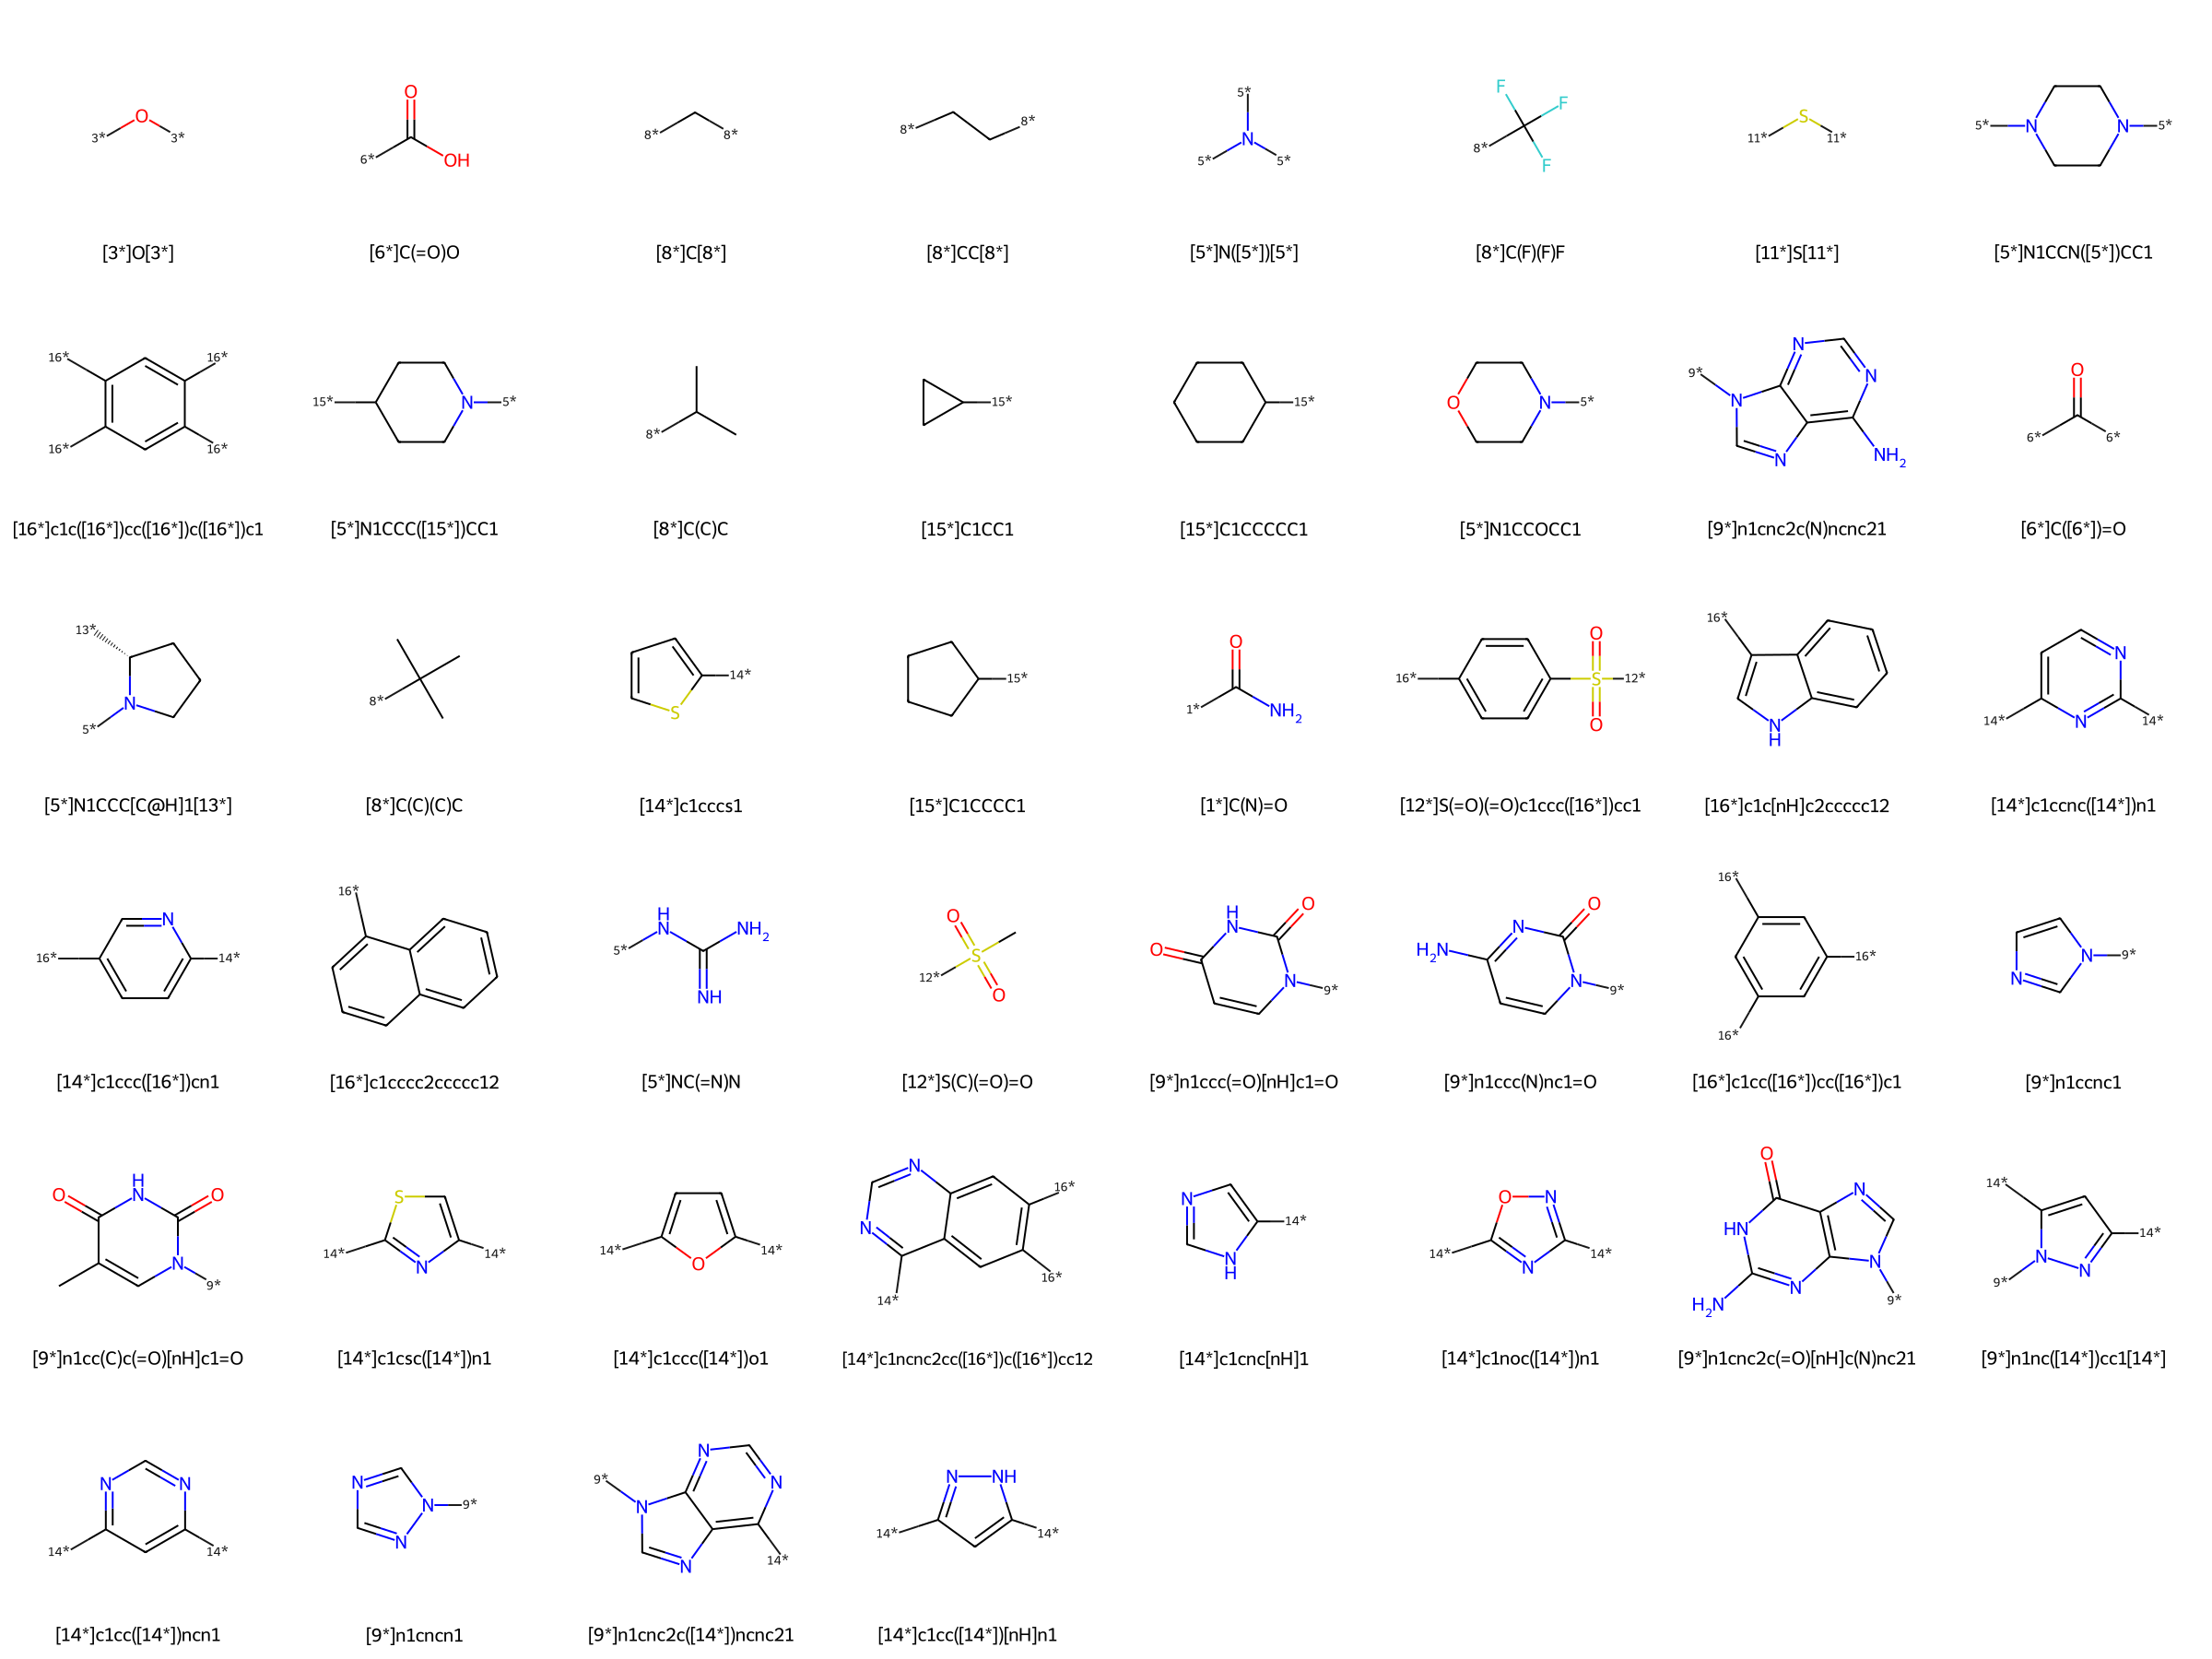

In [173]:
target_fragments = ['[3*]O[3*]', '[6*]C(=O)O', '[8*]C[8*]', '[8*]CC[8*]', '[5*]N([5*])[5*]', '[8*]C(F)(F)F', \
'[11*]S[11*]', '[5*]N1CCN([5*])CC1', '[16*]c1c([16*])cc([16*])c([16*])c1', '[5*]N1CCC([15*])CC1', '[8*]C(C)C', \
'[15*]C1CC1', '[15*]C1CCCCC1', '[5*]N1CCOCC1', '[9*]n1cnc2c(N)ncnc21', '[6*]C([6*])=O', '[5*]N1CCC[C@H]1[13*]', \
'[8*]C(C)(C)C', '[14*]c1cccs1', '[15*]C1CCCC1', '[1*]C(N)=O', '[12*]S(=O)(=O)c1ccc([16*])cc1', '[16*]c1c[nH]c2ccccc12', \
'[14*]c1ccnc([14*])n1', '[14*]c1ccc([16*])cn1', '[16*]c1cccc2ccccc12', '[5*]NC(=N)N', '[12*]S(C)(=O)=O', \
'[9*]n1ccc(=O)[nH]c1=O', '[9*]n1ccc(N)nc1=O', '[16*]c1cc([16*])cc([16*])c1', '[9*]n1ccnc1', '[9*]n1cc(C)c(=O)[nH]c1=O', \
'[14*]c1csc([14*])n1', '[14*]c1ccc([14*])o1', '[14*]c1ncnc2cc([16*])c([16*])cc12', '[14*]c1cnc[nH]1', '[14*]c1noc([14*])n1', \
'[9*]n1cnc2c(=O)[nH]c(N)nc21', '[9*]n1nc([14*])cc1[14*]', '[14*]c1cc([14*])ncn1', '[9*]n1cncn1', '[9*]n1cnc2c([14*])ncnc21', \
'[14*]c1cc([14*])[nH]n1']

# 将 [x*] 替换为 [H,$([x*])]
def convert_fragment_to_smarts(fragment):
    # 找到所有形如 [x*] 的部分，并替换为 [H,$([x*])]
    for isotope in range(1, 17):  # 假设同位素标记的范围在 1 到 16 之间
        fragment = fragment.replace(f"[{isotope}*]", f"[H,$([{isotope}*])]")
    return fragment

# 转换所有片段
smart_fragments = [convert_fragment_to_smarts(frag) for frag in target_fragments]
print(smart_fragments)

import re
from itertools import product

# 原始的带有同位素标记的片段列表
target_fragments = [
    "[3*]O[3*]", "[6*]C(=O)O", "[8*]C[8*]", "[8*]CC[8*]", "[5*]N([5*])[5*]", "[8*]C(F)(F)F",
    "[11*]S[11*]", "[5*]N1CCN([5*])CC1", "[16*]c1c([16*])cc([16*])c([16*])c1", "[5*]N1CCC([15*])CC1",
    "[8*]C(C)C", "[15*]C1CC1", "[15*]C1CCCCC1", "[5*]N1CCOCC1", "[9*]n1cnc2c(N)ncnc21", "[6*]C([6*])=O", 
    "[5*]N1CCC[C@H]1[13*]", "[8*]C(C)(C)C", "[14*]c1cccs1", "[15*]C1CCCC1", "[1*]C(N)=O",
    "[12*]S(=O)(=O)c1ccc([16*])cc1", "[16*]c1c[nH]c2ccccc12", "[14*]c1ccnc([14*])n1",
    "[14*]c1ccc([16*])cn1", "[16*]c1cccc2ccccc12", "[5*]NC(=N)N", "[12*]S(C)(=O)=O",
    "[9*]n1ccc(=O)[nH]c1=O", "[9*]n1ccc(N)nc1=O", "[16*]c1cc([16*])cc([16*])c1", "[9*]n1ccnc1", 
    "[9*]n1cc(C)c(=O)[nH]c1=O", "[14*]c1csc([14*])n1", "[14*]c1ccc([14*])o1",
    "[14*]c1ncnc2cc([16*])c([16*])cc12", "[14*]c1cnc[nH]1", "[14*]c1noc([14*])n1",
    "[9*]n1cnc2c(=O)[nH]c(N)nc21", "[9*]n1nc([14*])cc1[14*]", "[14*]c1cc([14*])ncn1",
    "[9*]n1cncn1", "[9*]n1cnc2c([14*])ncnc21", "[14*]c1cc([14*])[nH]n1"
]


# 定义一个函数来生成每个 SMARTS 片段的所有可能组合
def generate_combinations(smarts):
    # 找到所有匹配 [x*] 格式的部分
    matches = re.findall(r"\[(\d+\*)\]", smarts)
    if not matches:
        return [smarts]  # 如果没有同位素标记，直接返回原片段

    # 对每个同位素标记替换成两种可能性：保留同位素标记或替换为 H
    options = []
    for match in matches:
        options.append([f"[{match}]", ""])

    # 使用 product 生成所有可能的组合
    combinations = []
    for combo in product(*options):
        temp_smarts = smarts
        for original, replacement in zip(matches, combo):
            temp_smarts = temp_smarts.replace(f"[{original}]", replacement, 1)  # 只替换一次
        combinations.append(temp_smarts)
    
    return combinations

# 生成所有片段的可能组合并存储到新列表
all_combinations = [generate_combinations(fragment) for fragment in target_fragments]

# 打印生成的列表
for combos in all_combinations:
    print(combos)


# Generate RDKit molecule objects for each fragment
molecules = [Chem.MolFromSmiles(smiles) for smiles in target_fragments]
smart_molecules = [Chem.MolFromSmarts(smart) for smart in smart_fragments]


# Create images for each molecule with larger font size for legends
options = Draw.MolDrawOptions()
options.legendFontSize = 20  # Increase the font size for SMILES labels
options.fontScale = 20.5      # 2D 结构图中字体大小

# Create images for each molecule and add their SMILES as captions
img = Draw.MolsToGridImage(molecules, legends=target_fragments, molsPerRow=8, subImgSize=(300, 300), drawOptions=options)
img1 = Draw.MolsToGridImage(smart_molecules, legends=target_fragments, molsPerRow=5, subImgSize=(300, 300), drawOptions=options)

# Save the image to a file
# img.save("target_fragments.png")

# Display the image (if running in a Jupyter Notebook, for example)
img
# img1

In [174]:
mol = Chem.MolFromSmiles('c1(c[nH]c2cccc(c12)n1cnc2cncnc12)c1ccnc(n1)n1ccc(N)nc1=O')

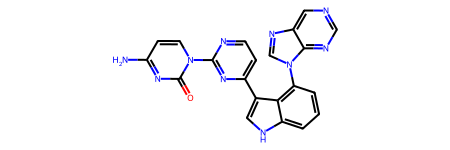

In [175]:
mol

In [176]:
res = list(BRICSDecompose(mol,returnMols=True))
smis = [Chem.MolToSmiles(x,True) for x in res]

In [177]:
smis

['[9*]n1ccc(N)nc1=O',
 '[9*]n1cnc2cncnc21',
 '[14*]c1ccnc([14*])n1',
 '[16*]c1cccc2[nH]cc([16*])c12']

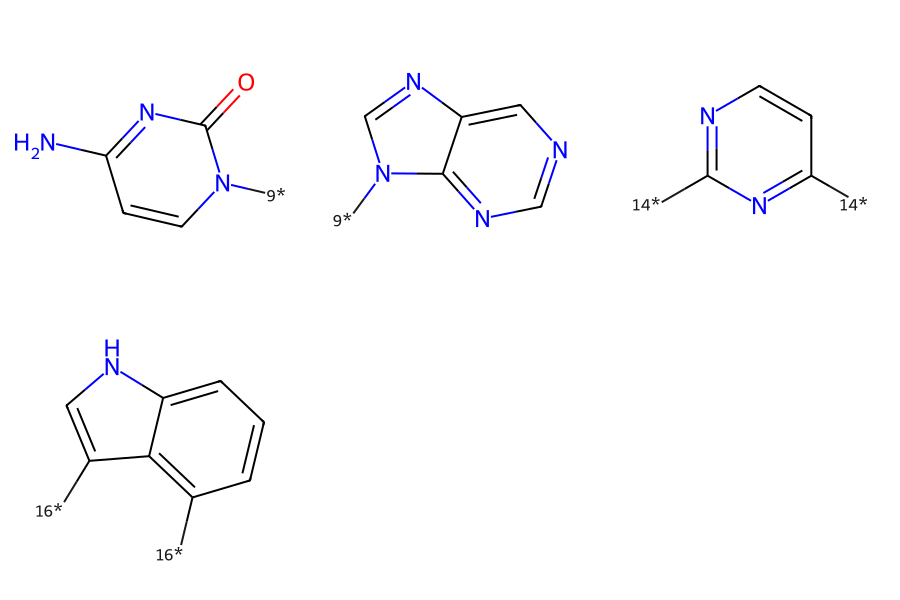

In [178]:
img = Draw.MolsToGridImage(res, subImgSize=(300, 300))
img

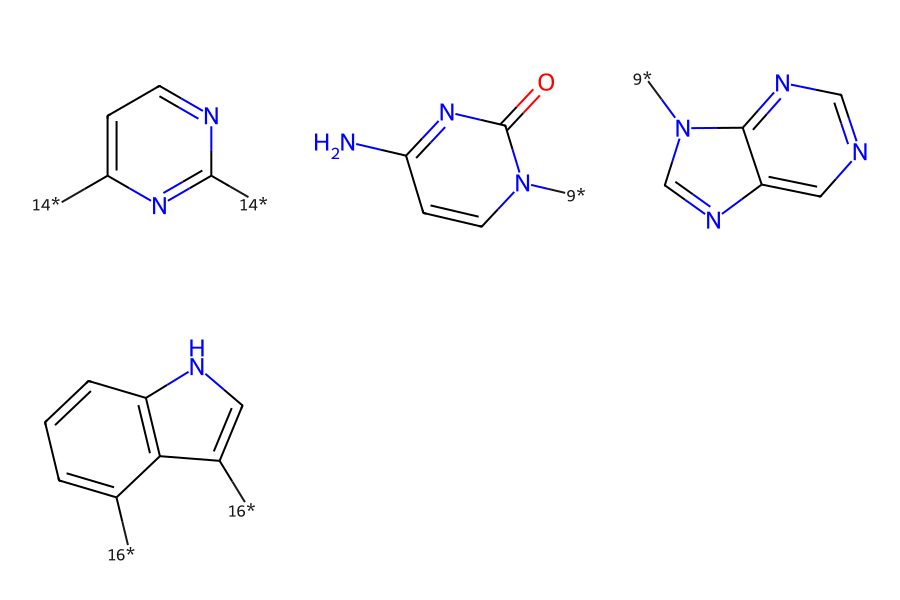

In [179]:
from rdkit.Chem import BRICS
mol = Chem.MolFromSmiles('c1(c[nH]c2cccc(c12)n1cnc2cncnc12)c1ccnc(n1)n1ccc(N)nc1=O')
fragments = list(BRICS.BRICSDecompose(mol))
fragments = [Chem.MolFromSmiles(s) for s in fragments]
img = Draw.MolsToGridImage(fragments, subImgSize=(300, 300))
img

[13:25:32] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 6 7 8 9
[13:25:32] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8


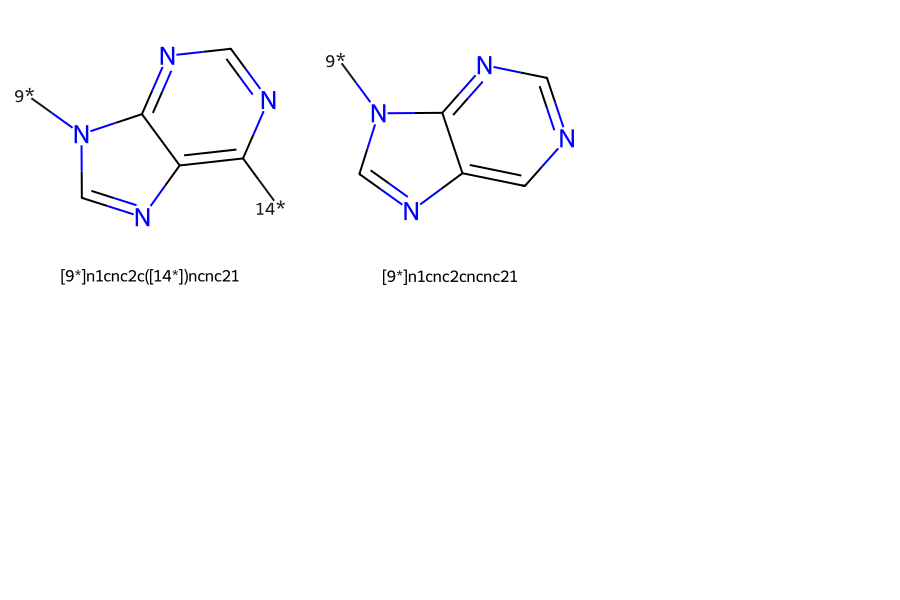

In [180]:
sss = ['[9*]n1cnc2c([14*])ncnc21', '[9*]n1cnc2cncnc21', 'n1cnc2c([14*])ncnc21', 'n1cnc2cncnc21']
sss1 = [Chem.MolFromSmiles(s) for s in sss]
img = Draw.MolsToGridImage(sss1, legends=sss, subImgSize=(300, 300))
img